# SVM

In [1]:
# importing variables from pre processing
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r label

In [2]:
# importing sklearn packages
from sklearn import svm
from sklearn.preprocessing import label_binarize

# model evaluation packages
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# importing libraries
import matplotlib.pyplot as plt

# TRAINING THE MODEL

In [4]:
classifier = svm.SVC(gamma=0.001)

In [5]:
# train the classifier
classifier.fit(X_train,y_train)

SVC(gamma=0.001)

In [6]:
y_pred = classifier.predict(X_test)

# EVALUATION OF MODEL

In [7]:
# calculate f1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score of svm: ",f1)

F1-score:  0.9059976499412485


In [8]:
# calculate accuraccy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of svm: ",accuracy)

Accuracy:  0.906


In [9]:
recall = recall_score(y_test,y_pred,average='macro')
print("Recall of svm: ",recall)# calculate recall

Recall:  0.9061288789977745


In [10]:
# calculate precision
precision = precision_score(y_test,y_pred,average='macro')
print("Precision of svm: ",precision)

Precision:  0.9060476511912798


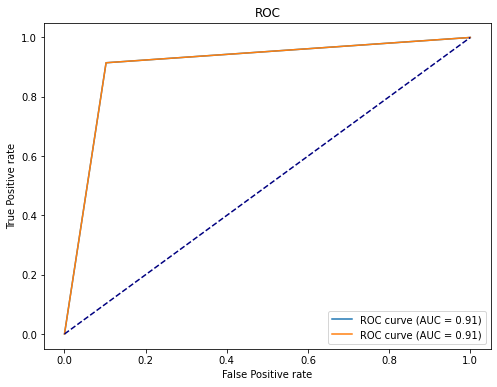

In [11]:
# Evaluate the roc

# compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(label)):
    fpr[i], tpr[i], _ = roc_curve(y_test,y_pred)
    roc_auc[i]=auc(fpr[i],tpr[i])

# plot the Roc curve for each class
plt.figure(figsize=(8,6))
for i in range(len(label)):
    plt.plot(fpr[i],tpr[i], label='ROC curve (AUC = %0.2f)' % roc_auc[i])
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [12]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)

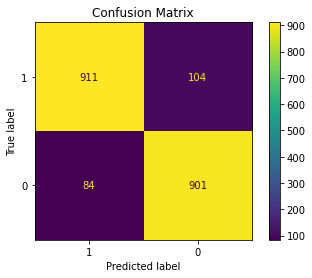

In [13]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=label)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

In [16]:
# saving the metrics for comparision
%store accuracy
%store precision
%store recall
%store f1

Stored 'accuracy' (float64)
Stored 'precision' (float64)
Stored 'recall' (float64)
Stored 'f1' (float64)
